In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
from keras.models import Sequential


ModuleNotFoundError: No module named 'tensorflow'

In [16]:
df= pd.read_csv("NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [17]:
print(df.shape)

(2035, 8)


In [18]:
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')


In [19]:
df_close=df["Close"]
print(max(df_close))
print(min(df_close))

325.75
80.95


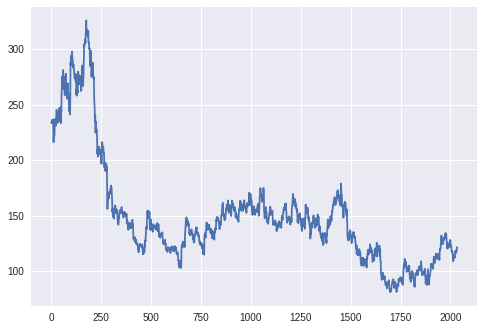

In [20]:
plt.style.use("seaborn")
plt.plot(df_close)

In [21]:
scaler= MinMaxScaler(
    feature_range=(0,1)
)
df_close= scaler.fit_transform(np.array(df_close).reshape(-1,1))
print(df_close.shape)

(2035, 1)


In [22]:
df_close

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [23]:
train_size=int(len(df_close)*(1/3))
test_size= len(df_close)-train_size

In [24]:
# Split the Dta into training and testing data
training_data= df_close[:train_size,:]
# testing_data= df_close[train_size:len(df_close): ]
testing_data= df_close[train_size:len(df_close):1]

In [25]:
def create_dataset(dataset, time_step=1):
    X_data,Y_data=[],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        X_data.append(a)
        Y_data.append(dataset[i+time_step, 0])
    return np.array(X_data), np.array(Y_data)

In [26]:
time_step=100
x_train,y_train= create_dataset(training_data,time_step)
x_test,y_test=create_dataset(testing_data,time_step)

In [27]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


NameError: name 'Sequential' is not defined